In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
passmark = 40

In [6]:
df = pd.read_csv("StudentsPerformance.csv")

In [7]:
df.head()

gender ethnicity parental_level_of_education         lunch  \
0  female   group B           bachelor's degree      standard   
1  female   group C                some college      standard   
2  female   group B             master's degree      standard   
3    male   group A          associate's degree  free/reduced   
4    male   group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
print (df.shape)

(1000, 8)


In [6]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [10]:
df.groupby('test_preparation_course').size()

test_preparation_course
completed    358
none         642
dtype: int64

In [11]:
clean_ds=df.drop(columns=['id', 'date', 'dl_applied', 'venue', 'player_of_match', 'umpire1', 'umpire2', 'umpire3' ], axis='1')
clean_ds.head(10)

KeyError: "['id' 'date' 'dl_applied' 'venue' 'player_of_match' 'umpire1' 'umpire2'\n 'umpire3'] not found in axis"

In [11]:
df['Math_PassStatus'] = np.where(df['math_score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

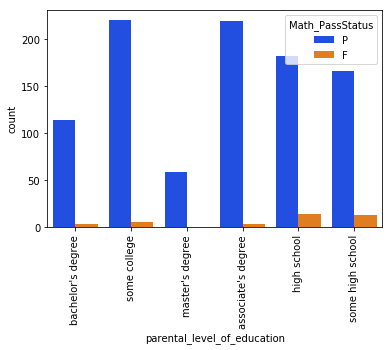

In [12]:
p = sns.countplot(x='parental_level_of_education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

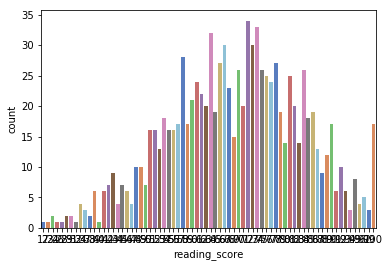

In [13]:
sns.countplot(x="reading_score", data = df, palette="muted")
plt.show()

In [14]:
df['Reading_PassStatus'] = np.where(df['reading_score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

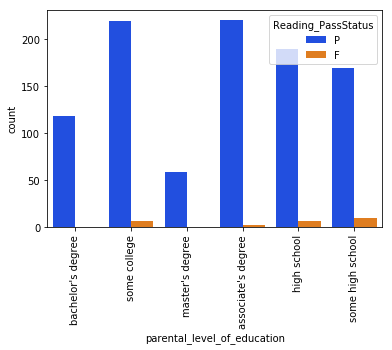

In [15]:
p = sns.countplot(x='parental_level_of_education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

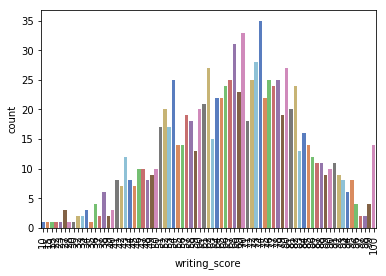

In [16]:
p = sns.countplot(x="writing_score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [17]:
df['Writing_PassStatus'] = np.where(df['writing_score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

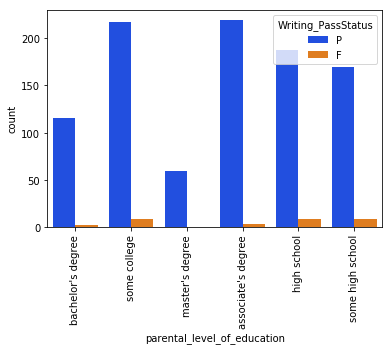

In [18]:
p = sns.countplot(x='parental_level_of_education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [19]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

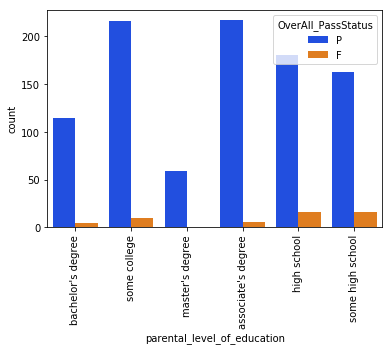

In [20]:
p = sns.countplot(x='parental_level_of_education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [21]:
df['Total_Marks'] = df['math_score']+df['reading_score']+df['writing_score']
df['Percentage'] = df['Total_Marks']/3

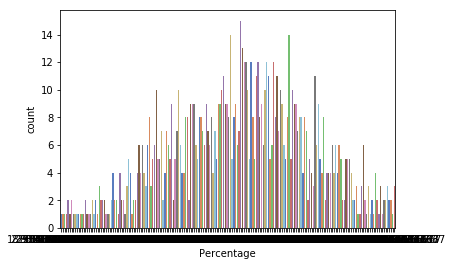

In [22]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [23]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

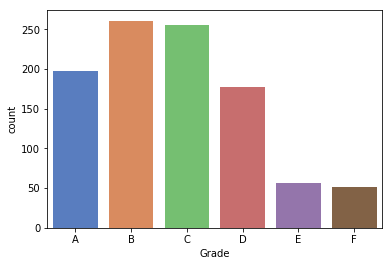

In [24]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

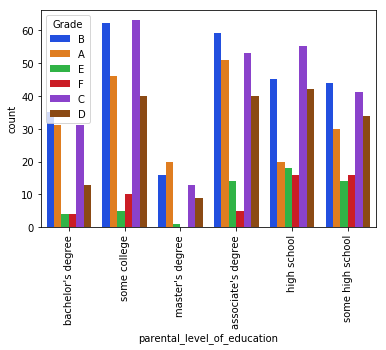

In [25]:
p = sns.countplot(x='parental_level_of_education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

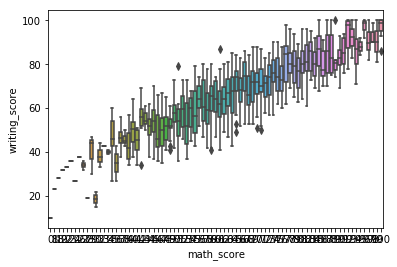

In [26]:
sns.boxplot(x="math_score",y="writing_score",data=df)

In [27]:
pd.get_dummies(df['gender'])

female  male
0         1     0
1         1     0
2         1     0
3         0     1
4         0     1
5         1     0
6         1     0
7         0     1
8         0     1
9         1     0
10        0     1
11        0     1
12        1     0
13        0     1
14        1     0
15        1     0
16        0     1
17        1     0
18        0     1
19        1     0
20        0     1
21        1     0
22        0     1
23        1     0
24        0     1
25        0     1
26        0     1
27        1     0
28        0     1
29        1     0
..      ...   ...
970       1     0
971       0     1
972       1     0
973       1     0
974       1     0
975       1     0
976       0     1
977       0     1
978       0     1
979       1     0
980       1     0
981       0     1
982       0     1
983       1     0
984       1     0
985       0     1
986       1     0
987       0     1
988       1     0
989       1     0
990       0     1
991       1     0
992       1     0
993       1     0
994       0     1
995       1     0
996       0     1
997       1     0
998       1     0
999       1     0

[1000 rows x 2 columns]

In [36]:
pd.get_dummies(df['gender'],drop_first=True)

male
0       0
1       0
2       0
3       1
4       1
5       0
6       0
7       1
8       1
9       0
10      1
11      1
12      0
13      1
14      0
15      0
16      1
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      1
25      1
26      1
27      0
28      1
29      0
..    ...
970     0
971     1
972     0
973     0
974     0
975     0
976     1
977     1
978     1
979     0
980     0
981     1
982     1
983     0
984     0
985     1
986     0
987     1
988     0
989     0
990     1
991     0
992     0
993     0
994     1
995     0
996     1
997     0
998     0
999     0

[1000 rows x 1 columns]

In [29]:
pd.get_dummies(df['test_preparation_course'],drop_first=True)

none
0       1
1       0
2       1
3       1
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      0
14      1
15      1
16      1
17      1
18      0
19      1
20      1
21      0
22      1
23      1
24      0
25      1
26      1
27      1
28      1
29      1
..    ...
970     1
971     0
972     0
973     1
974     1
975     0
976     0
977     1
978     0
979     1
980     1
981     1
982     0
983     0
984     1
985     1
986     1
987     0
988     1
989     0
990     0
991     0
992     1
993     1
994     1
995     0
996     1
997     0
998     0
999     1

[1000 rows x 1 columns]

In [30]:
ethnicity1=pd.get_dummies(df['ethnicity'])
ethnicity1.head()

group A  group B  group C  group D  group E
0        0        1        0        0        0
1        0        0        1        0        0
2        0        1        0        0        0
3        1        0        0        0        0
4        0        0        1        0        0

In [31]:
lunch1=pd.get_dummies(df['lunch'])
lunch1.head()

free/reduced  standard
0             0         1
1             0         1
2             0         1
3             1         0
4             0         1

In [32]:
pd.get_dummies(df['lunch'],drop_first=True)

standard
0           1
1           1
2           1
3           0
4           1
5           1
6           1
7           0
8           0
9           0
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          0
18          0
19          0
20          1
21          0
22          1
23          1
24          0
25          0
26          1
27          1
28          1
29          1
..        ...
970         1
971         1
972         0
973         0
974         1
975         1
976         0
977         1
978         1
979         1
980         0
981         1
982         1
983         1
984         1
985         1
986         1
987         1
988         0
989         0
990         0
991         1
992         0
993         0
994         1
995         1
996         0
997         0
998         1
999         0

[1000 rows x 1 columns]

In [37]:
lunch1=pd.get_dummies(df['lunch'],drop_first=True)

In [38]:
test=pd.get_dummies(df['test_preparation_course'],drop_first=True)

In [39]:
sex=pd.get_dummies(df['gender'],drop_first=True)

In [40]:
df=pd.concat([df,lunch1,test,sex],axis=1)

In [41]:
df.head(10)

gender ethnicity parental_level_of_education         lunch  \
0  female   group B           bachelor's degree      standard   
1  female   group C                some college      standard   
2  female   group B             master's degree      standard   
3    male   group A          associate's degree  free/reduced   
4    male   group C                some college      standard   
5  female   group B          associate's degree      standard   
6  female   group B                some college      standard   
7    male   group B                some college  free/reduced   
8    male   group D                 high school  free/reduced   
9  female   group B                 high school  free/reduced   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   
5                    none          71             83             78   
6               completed          88             95             92   
7                    none          40             43             39   
8               completed          64             64             67   
9                    none          38             60             50   

  Math_PassStatus Reading_PassStatus Writing_PassStatus OverAll_PassStatus  \
0               P                  P                  P                  P   
1               P                  P                  P                  P   
2               P                  P                  P                  P   
3               P                  P                  P                  P   
4               P                  P                  P                  P   
5               P                  P                  P                  P   
6               P                  P                  P                  P   
7               P                  P                  F                  F   
8               P                  P                  P                  P   
9               F                  P                  P                  F   

   Total_Marks  Percentage Grade  standard  none  male  
0          218   72.666667     B         1     1     0  
1          247   82.333333     A         1     0     0  
2          278   92.666667     A         1     1     0  
3          148   49.333333     E         0     1     1  
4          229   76.333333     B         1     1     1  
5          232   77.333333     B         1     1     0  
6          275   91.666667     A         1     0     0  
7          122   40.666667     F         0     1     1  
8          195   65.000000     C         0     0     1  
9          148   49.333333     F         0     1     0

In [42]:
df.drop(['gender','ethnicity','parental_level_of_education','lunch','test_preparation_course','Math_PassStatus','Reading_PassStatus','Writing_PassStatus','OverAll_PassStatus','Total_Marks','Percentage','Grade'],axis=1,inplace=True)

In [43]:
df.head(10)

math_score  reading_score  writing_score  standard  none  male
0          72             72             74         1     1     0
1          69             90             88         1     0     0
2          90             95             93         1     1     0
3          47             57             44         0     1     1
4          76             78             75         1     1     1
5          71             83             78         1     1     0
6          88             95             92         1     0     0
7          40             43             39         0     1     1
8          64             64             67         0     0     1
9          38             60             50         0     1     0

In [45]:
Y = df ['male']
X = df.drop (columns = ['male'], axis = 1)

In [47]:
Y.head(5)

0    0
1    0
2    0
3    1
4    1
Name: male, dtype: uint8

In [48]:
X.head(5)

math_score  reading_score  writing_score  standard  none
0          72             72             74         1     1
1          69             90             88         1     0
2          90             95             93         1     1
3          47             57             44         0     1
4          76             78             75         1     1

In [52]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
predictions = model.predict (X_test)

In [54]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        99
           1       0.91      0.86      0.88       101

   micro avg       0.89      0.89      0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [55]:
print (confusion_matrix (Y_test, predictions))

[[90  9]
 [14 87]]


In [56]:
accuracy_score (Y_test, predictions)

0.885